# Figure 4

The first step in recreating this figure is to import all of the needed packages to run the analysis. 

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import urllib.request

I use `urllib.request` to import the needed data file to complete the comparison. This data is pulled from the data file of our GitHub repository. 

In [2]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/LTibbs/BCB546X_MadMaize_final/master/data/12864_2015_1444_MOESM1_ESM.txt','12864_2015_1444_MOESM1_ESM.txt')      

('12864_2015_1444_MOESM1_ESM.txt', <http.client.HTTPMessage at 0x1e64dde24e0>)

I use `pd.read_table` to save the original tab delimited file as a readable/usable data frame. I save this new configuration as `Data_df`. 

In [3]:
Data_df = pd.read_table("12864_2015_1444_MOESM1_ESM.txt")
Data_df

,Sample,Accession,Original Bank,Genotyping Institution,species,group1,group2,Passport Species,Passport Classification,Country,...,Latitude,Longitude,lc,fw22,fw32,fw113,fas,ovate,sun,sun_dup
0,8697,8697,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8698,8698,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8699,8699,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8700,8700,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8701,8701,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8805,8805,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8806,8806,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8810,8810,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8813,8813,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8815,8815,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this comparison there are two columns of interest. We want to compare the Genetic PCA Classification (group 2) with the PCA Passport Classification. To do this I need to isolate only the needed columns (group 2 and Passport Classification); however, I descovered that to properly sort the table `species` and `Passport species` must be included. Python makes this easy.  I use square brackets to pull the desired columns and place them in a new data frame labeled `Filtered_df`. Note that `.copy()` is used to prevent the original `Data_df` from being altered. 

In [4]:
Filtered_df = Data_df[['species','group2', 'Passport Species', 'Passport Classification']].copy()
Filtered_df

,species,group2,Passport Species,Passport Classification
0,SLL,SLL_processing_1_2,SLL,SLL_processing
1,SLL,SLL_processing_1_1,SLL,SLL_processing
2,SLL,SLL_processing_1_1,SLL,SLL_processing
3,SLL,SLL_processing_1_2,SLL,SLL_processing
4,SLL,SLL_processing_1_2,SLL,SLL_processing
5,SLL,SLL_processing_1_1,SLL,SLL_processing
6,SLL,SLL_processing_1_1,SLL,SLL_processing
7,SLL,SLL_processing_1_1,SLL,SLL_processing
8,SLL,SLL_processing_1_1,SLL,SLL_processing
9,SLL,SLL_processing_1_1,SLL,SLL_processing


The original Figure 4 had a third dimension to the comparison. Along with comparing genetic and passport classifications, the occurrence of each combination of classification was shown. To show this in a graph the data frame must be compressed so that all identical PCA are compressed into one line and a count is then included in the table. `.groupby`, `.columns.tolist`, `.size` are used to complete this task. This code also adds a new column to the data frame named `Size`. The count of each classification comparison is then placed in the size column. All of this is saved to `Ordered_df`.

In [5]:
Ordered_df = Filtered_df.groupby(Filtered_df.columns.tolist()).size().reset_index().rename(columns={0:'size'}).sort_values(['species', 'Passport Species','group2', 'Passport Classification'], ascending=True)
Ordered_df

,species,group2,Passport Species,Passport Classification,size
0,SG,SG,SG,SC_Galapagos Islands (Coast),1
1,SG,SG,SG,SG_Galapagos Islands (Inland),1
2,SLC,SLC_1,SLC,SLC,2
3,SLC,SLC_1,SLC,SLC_cultivated_cherry,2
5,SLC,SLC_Asia,SLC,SLC,6
6,SLC,SLC_Asia,SLC,SLC_Asia,4
7,SLC,SLC_Asia,SLC,SLC_Mesoamerica,1
8,SLC,SLC_Asia,SLC,SLC_cultivated_cherry,1
11,SLC,SLC_Colombia,SLC,SLC,2
12,SLC,SLC_Colombia,SLC,SLC_Colombia,5


I cut down the data to only include PCA with five or more occurrences. To do this I use the `.loc` function to isolate the `size` column and include values only larger than 1. This is then saved as `Reduced_df`.

In [6]:
Reduced_df = Ordered_df.loc[Ordered_df['size'] > 1]
Reduced_df

,species,group2,Passport Species,Passport Classification,size
0,SG,SG,SG,SC_Galapagos Islands (Coast),1
1,SG,SG,SG,SG_Galapagos Islands (Inland),1
2,SLC,SLC_1,SLC,SLC,2
3,SLC,SLC_1,SLC,SLC_cultivated_cherry,2
5,SLC,SLC_Asia,SLC,SLC,6
6,SLC,SLC_Asia,SLC,SLC_Asia,4
7,SLC,SLC_Asia,SLC,SLC_Mesoamerica,1
8,SLC,SLC_Asia,SLC,SLC_cultivated_cherry,1
11,SLC,SLC_Colombia,SLC,SLC,2
12,SLC,SLC_Colombia,SLC,SLC_Colombia,5


The data is now ready to be graphed. I used seaborn `.relplot` to create a graph as close to the original as I can get. First I used `.set_style` to set a thyme that fits well. I was unable to find a way to change the color of the background based on the classification of the sample but I was still able to implement a gridded background using the `darkgrid` theme. I then used `.relplot` to create the graph. I identified both my x and y axis as the two classifications being compared and then identify the data source as the manipulated data set from earlier, `Reduced_df`.  To change the shape of the markers to square I identified `marker` as `s`. To change the size of the markers to show occurrence of a sample I used the `size` column and linked it to the `size` function of `.relplot`. I then used `sizes` to adjust the ratio of marker size to fit a more appealing look. To improve ascetics, I used `height` and `aspect` to make a more appealing looking graph. Finally, I modified the labels of the axes and the tick labels to fit a more comfortable look. 

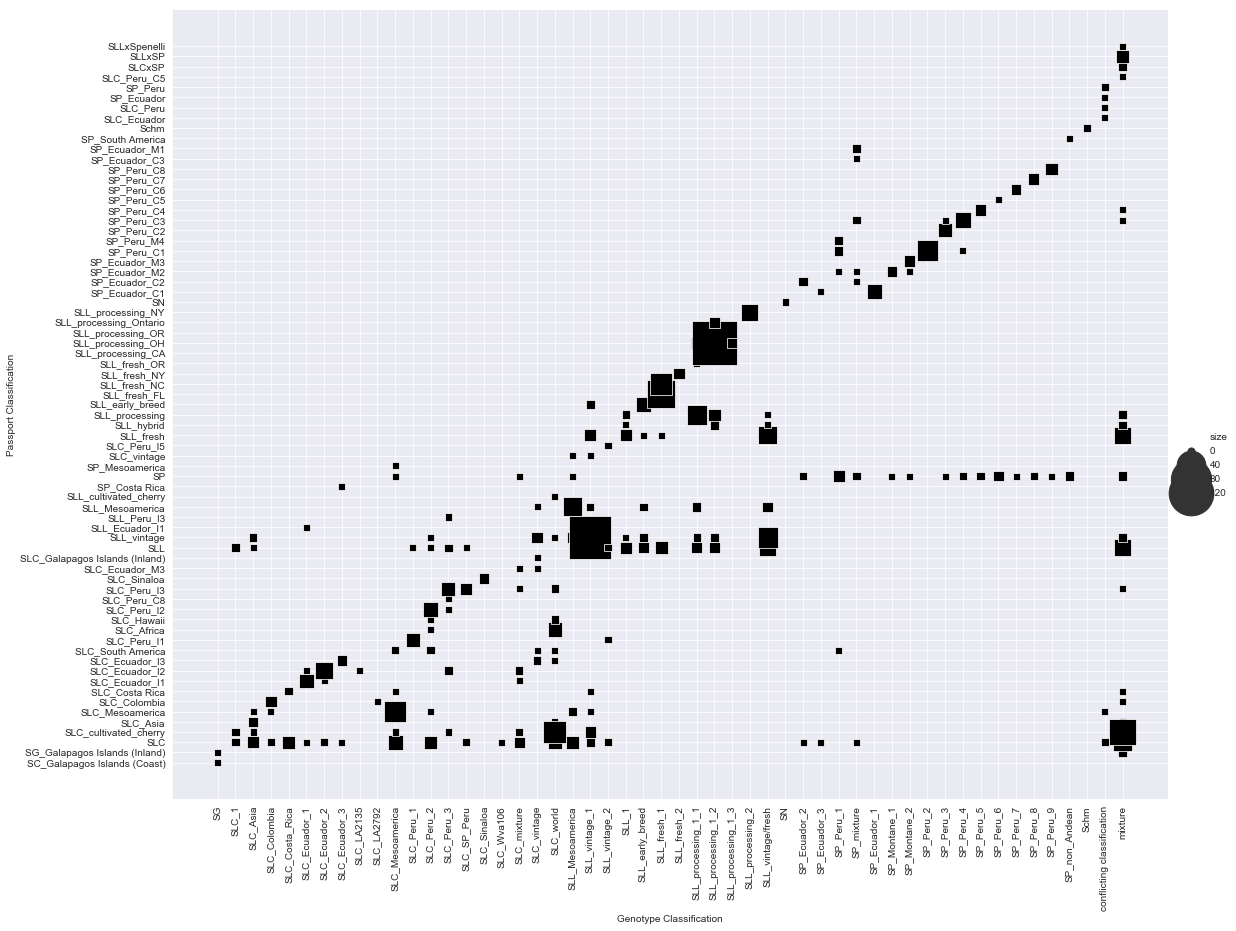

In [7]:
sns.set_style("darkgrid")
Fig_4 = sns.relplot("group2", 
                    "Passport Classification",
                    data = Reduced_df,
                    color = "black",
                    marker = "s",
                    size = "size",
                    sizes= (50, 2000),
                    height = 11.7,
                    aspect=11.7/8.27
                    )
Fig_4.set_axis_labels('Genotype Classification', 'Passport Classification')
Fig_4.set_xticklabels(rotation=90)
Fig_4.savefig("Fig_4.pdf")